<a href="https://colab.research.google.com/github/LeoFernanndes/notebooks/blob/master/titanic_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/LeoFernanndes/functions
!pip install category_encoders

Cloning into 'functions'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 48 (delta 25), reused 32 (delta 12), pack-reused 0
Unpacking objects: 100% (48/48), done.
     |████████████████████████████████| 102kB 3.5MB/s 


In [2]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


url_train = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/titanic_%20train.csv'
url_test = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/titanic_test.csv'
url_dataframe_feature_engineering = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/titanic_feature_engineering.csv'

columns_order = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']

train = pd.read_csv(url_train).reindex(columns_order, axis= 1)
test = pd.read_csv(url_test).reindex(columns_order.remove('Survived'), axis= 1)
feature_engineering = pd.read_csv(url_dataframe_feature_engineering)

dataframe = train.append(test, sort= False).set_index(np.arange(0,1309), columns_order)
backup = dataframe.copy()


dataframe['Embarked'] = dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0])
dataframe['Fare'] = dataframe['Fare'].fillna(dataframe['Fare'].mean())
dataframe['Age'] = dataframe['Age'].fillna(dataframe.groupby(by= ['Sex', 'Pclass'])['Age'].transform('mean'))
dataframe['Cabin'] = dataframe['Cabin'].fillna('Missing')
dataframe['Family_size'] = dataframe['Parch'] + dataframe['SibSp']

def age_(x):
  if x < 21:
    return 1
  elif x < 25:
    return 2
  elif x < 30:
    return 3
  elif x < 40:
    return 4
  else:
    return 5

dataframe['Age_bins'] = dataframe['Age'].apply(age_)

def fare_(x):
  if x < 8:
    return 1
  elif x < 10:
    return 2
  elif x < 21:
    return 3
  elif x < 41:
    return 4
  else:
    return 5

dataframe['Fare_bins'] = dataframe['Fare'].apply(fare_)


feature_engineering['Survived'] = feature_engineering['Survived'].astype(int)


fe = feature_engineering.copy()
df = dataframe.copy()
"""
data_preprocessing.naive_data_preparation(df)
df_train = df.iloc[0:700]
df_validation = df.iloc[700:891]
df_test = df.iloc[891:]"""

'\ndata_preprocessing.naive_data_preparation(df)\ndf_train = df.iloc[0:700]\ndf_validation = df.iloc[700:891]\ndf_test = df.iloc[891:]'

In [0]:
import category_encoders as ce
from sklearn.preprocessing import scale


categorical = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Family_size', 'Embarked', 'Age_bins', 'Fare_bins']

for feature in categorical:
  count = ce.CountEncoder()
  df[feature + '_count'] = df[feature].astype('str')
  df[feature + '_count'] = count.fit_transform(df[feature + '_count'])
  
for feature in categorical:
  target = ce.TargetEncoder()
  df[feature + '_target'] = df[feature].astype('str')
  target.fit(df[feature + '_target'].iloc[:891], df['Survived'].iloc[:891])
  df[feature + '_target'] = target.transform(df[feature + '_target'])


categorical_ = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for feature in categorical_:
  ohe = ce.OneHotEncoder()
  ohe.fit(df[feature].astype('str'))
  df = pd.concat([df, ohe.transform(df[feature])], axis= 1)


to_scale = ['Fare', 'Age']
for feature in to_scale:
  df[feature + '_scale'] = scale(df[feature])


In [0]:
#df.info()

In [5]:
fe.head().dtypes

Unnamed: 0       int64
Sex              int64
Ticket           int64
Age            float64
Fare           float64
Name             int64
PassengerId      int64
Title            int64
Title_n        float64
Cabin            int64
Pclass           int64
Fare_            int64
Pclass_          int64
Family           int64
Family_          int64
Age_             int64
SibSp            int64
Embarked         int64
Parch            int64
Survived         int64
dtype: object

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from functions import data_preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier


data_preprocessing.naive_data_preparation(df)
df_train = df.iloc[0:700]
df_validation = df.iloc[700:891]
df_test = df.iloc[891:]
fe = feature_engineering.copy()


colunas1 = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

clf1 = RandomForestClassifier()
result1 = cross_val_score(clf1, df_train[colunas1], df_train['Survived'], cv= 10)


colunas2 = ['Age_bins', 'Fare_bins', 'Pclass_count', 'Sex_count', 'Family_size_count', 'Embarked_count', 'Age_bins_count',
       'Fare_bins_count', 'Family_size_target', 'Embarked_target',
       'Age_bins_target', 'Fare_bins_target', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_1', 'Sex_2', 'Fare_scale', 'Age_scale']

clf2 = RandomForestClassifier()
result2 = cross_val_score(clf2, df_train[colunas2], df_train['Survived'], cv= 10)

clf2.fit(df_train[colunas2], df_train['Survived'])
feat_imp_ = clf2.feature_importances_
feat_imp = pd.DataFrame({'feature': colunas2,
                         'importance': feat_imp_}).sort_values(by= ['importance'], ascending= False)


colunas3 = ['Fare_', 'Age_', 'Title_n', 'Pclass_', 'Family_', 'Cabin']

clf3 = RandomForestClassifier()
result3 = cross_val_score(clf3, fe[colunas3], fe['Survived'], cv= 10)


print('ootb', result1.mean(), '\n',
      'fe', result2.mean(), '\n', 
      'best', result3.mean(), '\n',
      feat_imp)      

ootb 0.8271428571428572 
 fe 0.8028571428571428 
 best 0.7539459776864357 
                feature  importance
17          Fare_scale    0.195354
18           Age_scale    0.175609
16               Sex_2    0.099690
3            Sex_count    0.095264
15               Sex_1    0.083387
8   Family_size_target    0.054844
2         Pclass_count    0.050638
4    Family_size_count    0.046909
11    Fare_bins_target    0.028765
6       Age_bins_count    0.028376
0             Age_bins    0.028017
10     Age_bins_target    0.027427
1            Fare_bins    0.025385
7      Fare_bins_count    0.021533
9      Embarked_target    0.020958
5       Embarked_count    0.017843
12            Pclass_1    0.000000
13            Pclass_2    0.000000
14            Pclass_3    0.000000


In [7]:
colunas = ['Age_bins', 'Fare_bins', 'Pclass_count', 'Sex_count', 'Family_size_count', 'Embarked_count', 'Age_bins_count',
       'Fare_bins_count', 'Family_size_target', 'Embarked_target',
       'Age_bins_target', 'Fare_bins_target', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_1', 'Sex_2', 'Fare_scale', 'Age_scale', 'Survived']

fe_train = fe.iloc[:891].copy()
fe_test = fe.iloc[891:].copy()

classifiers = [AdaBoostClassifier(n_estimators=500),
               ExtraTreesClassifier(n_estimators=500, n_jobs=-1, criterion='gini',max_depth=5),
               XGBClassifier(n_estimators=500, nthread=-1, max_depth = 5, seed=1729),
               GradientBoostingClassifier(n_estimators=500),
               DecisionTreeClassifier(),
               AdaBoostClassifier(n_estimators=250),
               ExtraTreesClassifier(n_estimators=250, n_jobs=-1, criterion='gini',max_depth=5),
               XGBClassifier(n_estimators=250, nthread=-1, max_depth = 5, seed=1729),
               GradientBoostingClassifier(n_estimators=250),
               DecisionTreeClassifier(),
               LinearDiscriminantAnalysis(),
               RandomForestClassifier(n_estimators= 100),
               RandomForestClassifier(n_estimators= 300),
               LGBMClassifier()]


for clf in classifiers:
  clf.fit(df_train[colunas[:-1]], df_train['Survived'])
  pred = clf.predict(df_validation[colunas[:-1]])
  model = str(clf).split('(')[0]
  
  accuracy_score_1 = accuracy_score(pred, df_validation[colunas[-1]])
  f1_score_1 = f1_score(pred, df_validation[colunas[-1]])

  print('{}, Accuracy: {}, f1_score: {}'.format(model, accuracy_score_1, f1_score_1))

AdaBoostClassifier, Accuracy: 0.8324607329842932, f1_score: 0.7681159420289855
ExtraTreesClassifier, Accuracy: 0.806282722513089, f1_score: 0.7086614173228347
XGBClassifier, Accuracy: 0.8272251308900523, f1_score: 0.7755102040816326
GradientBoostingClassifier, Accuracy: 0.8743455497382199, f1_score: 0.8309859154929577
DecisionTreeClassifier, Accuracy: 0.7853403141361257, f1_score: 0.7248322147651006
AdaBoostClassifier, Accuracy: 0.8272251308900523, f1_score: 0.762589928057554
ExtraTreesClassifier, Accuracy: 0.806282722513089, f1_score: 0.7086614173228347
XGBClassifier, Accuracy: 0.8534031413612565, f1_score: 0.8028169014084506
GradientBoostingClassifier, Accuracy: 0.8429319371727748, f1_score: 0.7857142857142857
DecisionTreeClassifier, Accuracy: 0.7905759162303665, f1_score: 0.7333333333333333
LinearDiscriminantAnalysis, Accuracy: 0.8219895287958116, f1_score: 0.7424242424242424
RandomForestClassifier, Accuracy: 0.8324607329842932, f1_score: 0.7746478873239436
RandomForestClassifier, A

Accuracy: 0.8010471204188482, f1_score: 0.6935483870967741
Accuracy: 0.8219895287958116, f1_score: 0.7384615384615385
Accuracy: 0.8272251308900523, f1_score: 0.748091603053435


KeyboardInterrupt: ignored

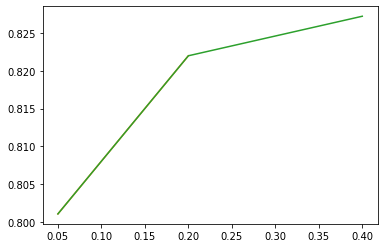

In [9]:
colunas = ['Age_bins', 'Fare_bins', 'Pclass_count', 'Sex_count', 'Family_size_count', 'Embarked_count', 'Age_bins_count',
       'Fare_bins_count', 'Family_size_target', 'Embarked_target',
       'Age_bins_target', 'Fare_bins_target', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_1', 'Sex_2', 'Fare_scale', 'Age_scale', 'Survived']

dataframe_stack_train = df.iloc[:700]
dataframe_stack_test = df.iloc[700:891]
dataframe_stack_classification = df.iloc[:891]
dataframe_stack_submit = df.iloc[891:]

df_stack_train = pd.DataFrame({'PassengerId': dataframe_stack_train['PassengerId']}).set_index(['PassengerId'])
df_stack_test = pd.DataFrame({'PassengerId': dataframe_stack_test['PassengerId']}).set_index(['PassengerId'])
df_stack_classification = pd.DataFrame({'PassengerId': dataframe_stack_classification['PassengerId']}).set_index(['PassengerId'])
df_stack_submit = pd.DataFrame({'PassengerId': dataframe_stack_submit['PassengerId']}).set_index(['PassengerId'])


classifiers = [AdaBoostClassifier(n_estimators=500),
               ExtraTreesClassifier(n_estimators=500, n_jobs=-1, criterion='gini',max_depth=5),
               XGBClassifier(n_estimators=500, nthread=-1, max_depth = 5, seed=1729),
               GradientBoostingClassifier(n_estimators=500),
               DecisionTreeClassifier(),
               AdaBoostClassifier(n_estimators=250),
               ExtraTreesClassifier(n_estimators=250, n_jobs=-1, criterion='gini',max_depth=5),
               XGBClassifier(n_estimators=250, nthread=-1, max_depth = 5, seed=1729),
               GradientBoostingClassifier(n_estimators=250),
               DecisionTreeClassifier(),
               LinearDiscriminantAnalysis(),
               RandomForestClassifier(n_estimators= 100),
               RandomForestClassifier(n_estimators= 300),
               LGBMClassifier()]


cv_splits = [0.05, 0.2, 0.4, 0.6, 0.8, 0.95]

x_axis = []
y_axis = []


for split in cv_splits:

  iterations = 2


  # training stage 
  for clf in classifiers:
    for n in range(iterations):  


      x_train, x_test, y_train, y_test = train_test_split(dataframe_stack_train[colunas[:-1]],
                                                          dataframe_stack_train[colunas[-1]], train_size= split, random_state= None)


      clf.fit(x_train, y_train)

      
      clf_ = clf.predict(dataframe_stack_test[colunas[:-1]])
      clf_dataframe_ = pd.DataFrame({n: clf_}, index= df_stack_test.index)
      df_stack_test = pd.concat([df_stack_test, clf_dataframe_], axis= 1)


  mean = df_stack_test.mean(axis= 1)
  mode = df_stack_test.mode(axis= 1)


  f1_score_ = f1_score(mode[0], dataframe_stack_test['Survived'])
  accuracy_score_ = accuracy_score(mode[0], dataframe_stack_test['Survived'])

  x_axis.append(split)
  y_axis.append(accuracy_score_)

  # submission classification stage
  for clf in classifiers:
    for n in range(iterations):  


      x_train, x_test, y_train, y_test = train_test_split(dataframe_stack_classification[colunas[:-1]],
                                                          dataframe_stack_classification[colunas[-1]], train_size= split, random_state= None)


      clf.fit(x_train, y_train)

      
      clf_ = clf.predict(dataframe_stack_submit[colunas[:-1]])
      clf_dataframe_ = pd.DataFrame({n: clf_}, index= df_stack_submit.index)
      df_stack_submit = pd.concat([df_stack_submit, clf_dataframe_], axis= 1)


  mean_submission = df_stack_submit.mean(axis= 1)
  mode_submission = df_stack_submit.mode(axis= 1)[0]


  submission = list(mode_submission.map({0.0: 0, 1.0: 1}))
  envio = pd.DataFrame({'PassengerId': dataframe_stack_submit['PassengerId'],
                        'Survived': submission}).set_index(['PassengerId'])

  from google.colab import files


  envio.to_csv('titanic_submission_5.csv')

  print('Accuracy: {}, f1_score: {}'.format(accuracy_score_, f1_score_))

  plt.plot(x_axis, y_axis)